# Time Series Regression (TSR) with aeon


Time Series Classification (TSR) involves training a model from a collection of time
series (real valued, ordered, data) in order to predict a continuous target variable.

<img src="img/tser.png" width="600" alt="time series regression"> [<i>&#x200B;
</i>](img/tser.png)

There are two types of TSR.

1) Time Series Forecasting Regression (TSFR) relates to
forecasting reduced to regression through a sliding window. This is the more familiar
 type to most people

2) Time Series *Extrinsic* Regression (TSER). Tan et al. [1] formally specified a
related, but distinct, type of time series regression problem: . Rather than being derived from a forecasting problem, TSER involves a predictive model built on time series to predict a real-valued variable distinct from the training input series. For example, shows soil spectrograms which can be used to estimate the potassium concentration.
 Ground truth is found through expensive lab based experiments that take some time. Spectrograms (ordered data series we treat as time series) are cheap to obtain and the data can be collected in any environment. An accurate regressor from spectrogram to concentration would make land and crop management more efficient.

<img src="img/spectra.png" width="600" alt="spectrograph example">
[<i>&#x200B;
</i>](img/spectra.png)

Both types require time series regressors. `aeon` contain a range of regressors,
broadly aligned with classifiers.


## Data Storage and Problem Types

Regressors and take time series input as either 3D numpy of shape `(n_cases,
n_channels, n_timepoints)` for equal length series or as as a list of 2D numpy of
length `[n_cases]`. All regressors work with equal length problems. Regression
functionality for unequal length is currently limited.

`aeon` ships two example regression problems in the `datasets` module:

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np

from aeon.datasets import load_cardano_sentiment, load_covid_3month

warnings.filterwarnings("ignore")

covid_train, covid_trainy = load_covid_3month(split="train")
covid_test, covid_testy = load_covid_3month(split="test")
cardano_train, cardano_trainy = load_cardano_sentiment(split="train")
cardano_test, cardano_testy = load_cardano_sentiment(split="test")
covid_train.shape

(140, 1, 84)

Covid 3 is from the [monash tser archive](http://tseregression.org/) who in turn got
the data from [WHO's COVID-19 database](https://covid19.who.int/). The goal of this dataset is to predict
 COVID-19's death rate on 1st April 2020 for  each country using daily confirmed
 cases for the last three months.
This dataset contains 201 time series (140 train, 61 test), where each time series is
the daily confirmed cases for a country. The data is univariate, each series length 84.
Please refer to

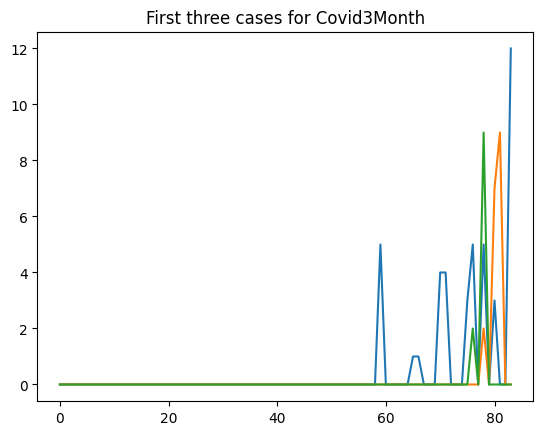

In [2]:
plt.title("First three cases for Covid3Month")
plt.plot(covid_train[0][0])
plt.plot(covid_train[1][0])
plt.plot(covid_train[2][0])

In [3]:
cardano_train.shape

(74, 2, 24)

By combining historical sentiment data for Cardano cryptocurrency, extracted from
    EODHistoricalData and made available on Kaggle, with historical price data for the
    same cryptocurrency, extracted from CryptoDataDownload, we created the
    CardanoSentiment dataset, with 107 instances. The predictors are hourly close price
    (in USD) and traded volume during a day, resulting in 2-dimensional time series of
    length 24. The response variable is the normalized sentiment score on the day
    spanned by the timepoints.

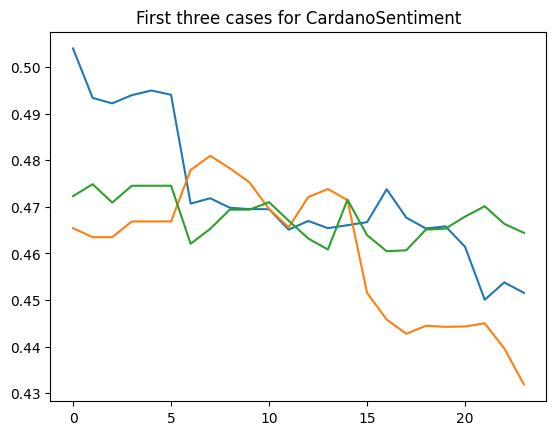

In [4]:
plt.title("First three cases for CardanoSentiment")
plt.plot(cardano_train[0][0])
plt.plot(cardano_train[1][0])
plt.plot(cardano_train[2][0])

# Time Series Regressors in aeon

All regressors inherit from the `BaseRegressor` class. Like classification and
clustering, regressors have methods `fit` and `predict` to train and use the model.
The list of regressors available can be found with `all_estimators`.

In [5]:
from aeon.registry import all_estimators

all_estimators("regressor", as_dataframe=True)

name  \
0                    CNNRegressor   
1                Catch22Regressor   
2                  DummyRegressor   
3            FreshPRINCERegressor   
4          InceptionTimeRegressor   
5    IndividualInceptionRegressor   
6   KNeighborsTimeSeriesRegressor   
7               RegressorPipeline   
8                 RocketRegressor   
9        SklearnRegressorPipeline   
10                TapNetRegressor   
11      TimeSeriesForestRegressor   

                                            estimator  
0   <class 'aeon.regression.deep_learning.cnn.CNNR...  
1   <class 'aeon.regression.feature_based._catch22...  
2     <class 'aeon.regression._dummy.DummyRegressor'>  
3   <class 'aeon.regression.feature_based._fresh_p...  
4   <class 'aeon.regression.deep_learning.inceptio...  
5   <class 'aeon.regression.deep_learning.inceptio...  
6   <class 'aeon.regression.distance_based._time_s...  
7   <class 'aeon.regression.compose._pipeline.Regr...  
8   <class 'aeon.regression.convolution_based._roc...  
9   <class 'aeon.regression.compose._pipeline.Skle...  
10  <class 'aeon.regression.deep_learning.tapnet.T...  
11  <class 'aeon.regression.interval_based._tsf.Ti...

Currently we have three deep learning, two feature based, one convolution based and
one distance based regressors, in addition to utility regressors such as Dummy.

In [6]:
from aeon.datasets import load_covid_3month
from aeon.regression.distance_based import KNeighborsTimeSeriesRegressor

covid_train, covid_trainy = load_covid_3month(split="train")
covid_test, covid_testy = load_covid_3month(split="test")
knn = KNeighborsTimeSeriesRegressor()
knn.fit(covid_train, covid_trainy)
p = knn.predict(covid_test)
sse = np.sum((covid_testy - p) * (covid_testy - p))
sse

0.17823940618016532

## Multivariate Classification
Nearly all of the regressors can handle multivariate data

In [7]:
all_estimators(
    "regressor", filter_tags={"capability:multivariate": True}, as_dataframe=True
)

name  \
0                   CNNRegressor   
1               Catch22Regressor   
2                 DummyRegressor   
3           FreshPRINCERegressor   
4         InceptionTimeRegressor   
5   IndividualInceptionRegressor   
6  KNeighborsTimeSeriesRegressor   
7                RocketRegressor   
8                TapNetRegressor   

                                           estimator  
0  <class 'aeon.regression.deep_learning.cnn.CNNR...  
1  <class 'aeon.regression.feature_based._catch22...  
2    <class 'aeon.regression._dummy.DummyRegressor'>  
3  <class 'aeon.regression.feature_based._fresh_p...  
4  <class 'aeon.regression.deep_learning.inceptio...  
5  <class 'aeon.regression.deep_learning.inceptio...  
6  <class 'aeon.regression.distance_based._time_s...  
7  <class 'aeon.regression.convolution_based._roc...  
8  <class 'aeon.regression.deep_learning.tapnet.T...

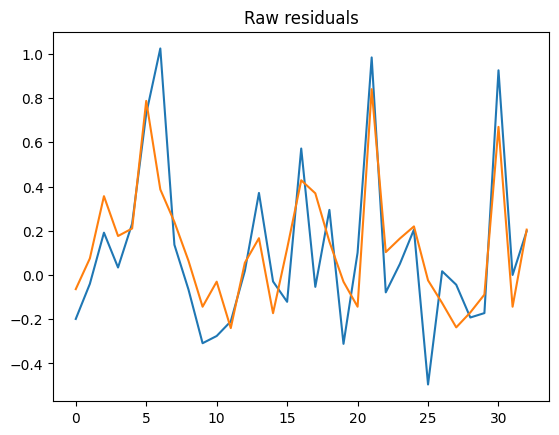

In [8]:
from aeon.regression import DummyRegressor

fp = KNeighborsTimeSeriesRegressor()
dummy = DummyRegressor()
dummy.fit(cardano_train, cardano_trainy)
knn.fit(cardano_train, cardano_trainy)
pred = knn.predict(cardano_test)
res_knn = cardano_testy - pred
res_dummy = cardano_testy - dummy.predict(cardano_test)
plt.title("Raw residuals")
plt.plot(res_knn)
plt.plot(res_dummy)

References
[1] Tan et al. "Time series extrinsic regression", Data Mining and Knowledge
Discovery, 35(3), 2021
[2] Guijo-Rubio et al. "Unsupervised Feature Based Algorithms for Time Series
Extrinsic Regression", ArXiv, 2023

